In [1]:
from IPython.display import Image

- [selenium](https://www.selenium.dev/documentation/en/) 

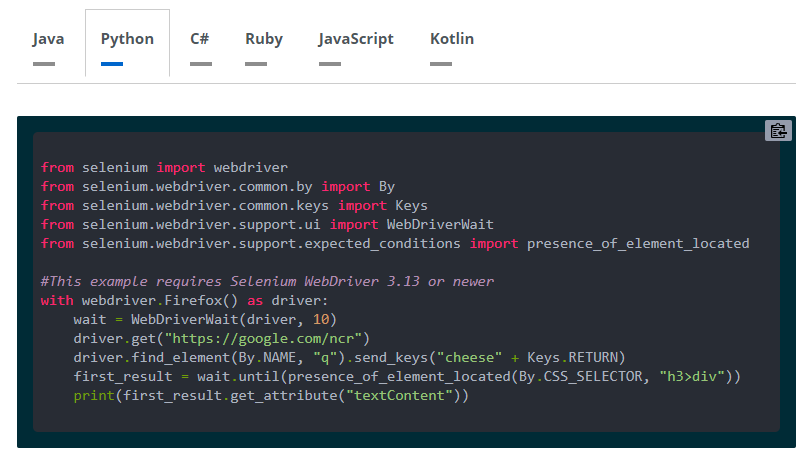

In [2]:
Image('cap/6번 (1).png')

In [ ]:
!pip install selenium

- 4103.116이 없어서 가장 가까운 버전으로 설치 : https://chromedriver.storage.googleapis.com/index.html?path=83.0.4103.39/

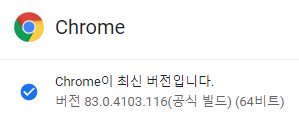

In [3]:
Image('cap/6번 (2).png')

### 대상사이트

- [싼 주유소 찾기 오피넷](http://www.opinet.co.kr/searRgSelect.do)
- 가능하면 인터넷 속도가 빠른 곳에서 수행(안정적), 대상 사이트가 느리면 보완하는 코드를 삽입
- 클릭, 로그인, 스크롤 등 작업을 수행한 이후에는 반드시 ★대기★
- 크롤링과 대기 시간 싱크가 안 맞아서 데이터를 획득하기 어려움
- DDOS를 방어하는 사이트도 존재 → 해결법 : 대기

In [ ]:
# 1. 모듈 가져오기
from selenium import webdriver as wd

In [ ]:
# 2. 브라우저 띄우기
driver = wd.Chrome('./tool/chromedriver.exe')

In [ ]:
# 3. 접속
import time

for n in range(2) : 
    target_site = 'http://www.opinet.co.kr/searRgSelect.do'
    driver.get(target_site)
    time.sleep(5)

In [ ]:
# 1. 시도 리스트 획득
# Ctrl + Shift + J → F12랑 같은 기능
# 문서 상에 존재하는 모든 요소 중에 ID가 SIDO_NM0인 요소를 찾아서 그 밑에 있는 직계 자식들 중 option을 다 찾음 → #SIDO_NM0>option

# driver.find_element_by_id 써도 됨
len(driver.find_elements_by_css_selector('#SIDO_NM0 > option'))

18

In [ ]:
# 결과물을 리스트에 담아서 출력
# 실습
ls = list()
for option in driver.find_elements_by_css_selector('#SIDO_NM0 > option') :
    # 1개의 option에서 value를 추출
    ls.append(option.get_attribute('value'))
    sido_nm0 = ls[1:]
print(sido_nm0)

['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도', '제주특별자치도']


In [ ]:
for option in driver.find_elements_by_css_selector('#SIDO_NM0 > option') :
    if option.get_attribute('value') :
        print(option.get_attribute('value'))

서울특별시
부산광역시
대구광역시
인천광역시
광주광역시
대전광역시
울산광역시
세종특별자치시
경기도
강원도
충청북도
충청남도
전라북도
전라남도
경상북도
경상남도
제주특별자치도


In [ ]:
for option in driver.find_elements_by_css_selector('#SIDO_NM0 > option') :
    if option.get_attribute('value') :
        print(option.get_attribute('value'))

서울특별시
부산광역시
대구광역시
인천광역시
광주광역시
대전광역시
울산광역시
세종특별자치시
경기도
강원도
충청북도
충청남도
전라북도
전라남도
경상북도
경상남도
제주특별자치도


In [ ]:
# 리스트 내포 : 간결한 처리를 위해 종종 사용됨
# [option.get_attribute('value') for option in driver.find_elements_by_css_selector('#SIDO_NM0 > option') if option.get_attribute('value')]

sidos = [
    option.get_attribute('value')
    for option in driver.find_elements_by_css_selector('#SIDO_NM0 > option')
    if option.get_attribute('value')
]

sidos[:2]

['서울특별시', '부산광역시']

In [ ]:
for sido in sidos[1:2] :
    print(sido)
    # 해당 시도로 변경
    # 1. 변경해야 하는 대상(요소)을 찾음
    sido_sel = driver.find_element_by_id('SIDO_NM0')
    # 2. 요소의 값을 변경(입력)
    sido_sel.send_keys(sido)
    # break
    # 3. 대기
    time.sleep(5)

부산광역시


In [ ]:
# 부산광역시 > 강서구 > 대저1동 이동
# 실습1
sigungus = [
    option.get_attribute('value')
    for option in driver.find_elements_by_css_selector('#SIGUNGU_NM0 > option')
    if option.get_attribute('value')
]

sigungus.index('강서구')

0

In [ ]:
for sigungu in sigungus[:1] :
    print(sigungu)
    sigungu_sel = driver.find_element_by_id('SIGUNGU_NM0')
    sigungu_sel.send_keys(sigungu)
    time.sleep(5)

강서구


In [ ]:
dongs = [
    option.get_attribute('value')
    for option in driver.find_elements_by_css_selector('#DONG_NM > option')
    if option.get_attribute('value')
]

dongs.index('대저1동')

5

In [ ]:
for dong in dongs[5:6] :
    print(dong)
    dong_sel = driver.find_element_by_id('DONG_NM')
    dong_sel.send_keys(dong)
    time.sleep(5)

대저1동


In [ ]:
# 실습2
TARGET_SIGUNGU = '강서구'

sigungus = [
    option.get_attribute('value')
    for option in driver.find_elements_by_css_selector('#SIGUNGU_NM0 > option')
    if option.get_attribute('value')
]

sigungu_idx = sigungus.index(TARGET_SIGUNGU)

for sigungu in sigungus[sigungu_idx:(sigungu_idx+1)] :
    print(sigungu)
    sigungu_sel = driver.find_element_by_id('SIGUNGU_NM0')
    sigungu_sel.send_keys(sigungu)
    time.sleep(5)

강서구


In [ ]:
TARGET_DONG = '대저1동'

dongs = [
    option.get_attribute('value')
    for option in driver.find_elements_by_css_selector('#DONG_NM > option')
    if option.get_attribute('value')
]

dongs_idx = dongs.index(TARGET_DONG)

for dong in dongs[dongs_idx:(dongs_idx+1)] :
    print(dong)
    dong_sel = driver.find_element_by_id('DONG_NM')
    dong_sel.send_keys(dong)
    time.sleep(5)

대저1동


In [ ]:
# (문제 변경) 부산광역시 > 모든 구로 이동 > 5초 후 > 엑셀 저장 버튼 클릭
# 실습
for sido in sidos[1:2] :
    # 시도
    print(sido)
    sido_sel = driver.find_element_by_id('SIDO_NM0')
    sido_sel.send_keys(sido)
    time.sleep(5)
    # 시군구 → 설정 → 데이터 변경 → 5초 대기
    sigungus = [
        option.get_attribute('value')
        for option in driver.find_elements_by_css_selector('#SIGUNGU_NM0 > option')
        if option.get_attribute('value')
    ]
    for sigungu in sigungus :
        print(sigungu)
        sigungu_sel = driver.find_element_by_id('SIGUNGU_NM0')
        sigungu_sel.send_keys(sigungu)
        # 클릭
        driver.find_element_by_id('vct').click()
        time.sleep(5)

부산광역시
강서구
금정구


KeyboardInterrupt: 

In [ ]:
# 답안
# 1. 시도 정보 획득
sidos = [
    option.get_attribute('value')
    for option in driver.find_elements_by_css_selector('#SIDO_NM0 > option')
    if option.get_attribute('value')
]
# 2. 시도 중 부산광역시만 탐색
for sido in sidos[1:2] :
    # 3. 시도를 실제 선택값으로 변경
    sido_sel = driver.find_element_by_id('SIDO_NM0')
    sido_sel.send_keys(sido)
    time.sleep(5)
    # 4. 시군구 → 설정 → 데이터 변경 → 5초 대기
    # 4-1. 시군구 목록 가져오기
    sigungus = [
        option.get_attribute('value')
        for option in driver.find_elements_by_css_selector('#SIGUNGU_NM0 > option')
        if option.get_attribute('value')
    ]
    # 4-2. 시군구에 하나씩 접근하여 주유소 정보를 갱신
    for sigungu in sigungus :
        # 시군구 select 태그에 값 적용
        driver.find_element_by_id('SIGUNGU_NM0').send_keys(sigungu)
        # 대기
        time.sleep(5)
        # 클릭
        driver.find_element_by_id('glopopd_excel').click()

In [ ]:
# 저장된 파일 목록 로드
from glob import glob

In [ ]:
# 특정 위치에서 특정 패턴을 가진 파일들만 모아라 : glob()
files = glob("C:/Users/amin/Downloads/지역_*.xls")
files[:2]

# 이 이후 : pandas 이용해서 데이터 밀어넣음

['C:/Users/amin/Downloads\\지역_위치별(주유소) (1).xls',
 'C:/Users/amin/Downloads\\지역_위치별(주유소) (10).xls']

In [ ]:
# 닫기(창 닫고, 프로세스도 종료)
driver.close()
driver.quit()